In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
## Lets create synthetic data points
from sklearn.datasets import make_regression

In [23]:
X,y = make_regression(n_samples=1000, n_features=2, n_targets=1, noise=3.0)

In [24]:
X

array([[-0.50310668, -1.10306124],
       [-0.34272056,  1.0181418 ],
       [-0.54546175, -1.82657957],
       ...,
       [ 0.97297498,  0.54452504],
       [ 0.38368024,  1.60379623],
       [-1.77701784,  1.01696126]])

In [25]:
y

array([-4.87449849e+01,  3.94643608e+01, -8.07662182e+01,  2.61435770e+00,
        1.72640405e+01, -2.55336123e+01, -7.63146984e+01,  1.89016541e+01,
        9.43263570e+00,  6.80648154e+01,  1.10190705e+01,  4.93551288e+01,
       -1.34751265e+01,  4.91220158e+01,  6.27236428e+01,  1.71771697e+01,
       -1.46113309e+01,  4.60820776e+01, -2.44641759e+01,  9.37333068e+00,
        6.24590198e+01,  2.51633896e+01, -3.89776326e+01, -1.01006867e+02,
       -2.63561734e+01, -2.94184336e+01, -1.17593766e+01, -1.81537207e+00,
       -5.33892674e+01,  2.85905844e+01, -2.42223621e+01,  5.22484975e+01,
        1.32167544e+01,  6.10624092e+01,  2.13303782e+01, -1.37792331e+01,
        3.00170397e+01, -3.68475513e+00, -6.75001187e+00, -3.00400825e+01,
        1.15095941e+01, -8.36802653e+01,  4.63995285e+01,  2.20026455e+01,
       -3.19743677e+01, -2.33226883e+01, -2.98101466e+01, -1.67794306e+00,
        2.69388379e+01, -3.53467999e+01, -2.65401859e+00,  2.75136882e+01,
       -1.01320596e-01,  

In [26]:
pd.DataFrame(X)[0]

0     -0.503107
1     -0.342721
2     -0.545462
3     -0.793049
4     -1.057328
         ...   
995   -0.293899
996    0.151328
997    0.972975
998    0.383680
999   -1.777018
Name: 0, Length: 1000, dtype: float64

<AxesSubplot: xlabel='0', ylabel='1'>

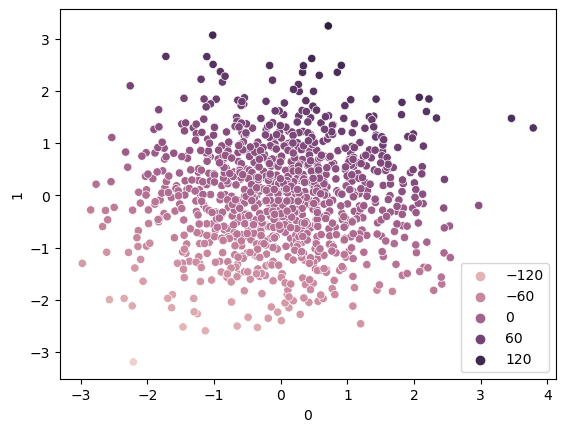

In [27]:
sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1], hue=y)

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=10)

In [29]:
from sklearn.svm import SVR

In [30]:
svr = SVR(kernel='linear')

In [31]:
svr.fit(X_train, y_train)

SVR(kernel='linear')

In [32]:
svr.coef_

array([[12.77804897, 40.7822123 ]])

In [33]:
## prediction
y_pred = svr.predict(X_test)

In [34]:
y_pred

array([-4.10171301e+01, -4.34025337e+01,  4.92236139e+01,  8.40751771e+00,
       -1.40007921e-02, -7.68352949e+01, -1.10504599e+02,  1.47546282e+00,
        4.95197639e+01, -6.12347035e-01, -1.10551657e+01, -2.87875853e+01,
        2.35013243e+01,  4.31953264e+01,  6.92278374e+01, -1.12245556e+01,
       -4.64383465e+01,  1.12749018e+01, -1.38362715e+01,  9.57980350e+01,
       -6.79673552e+00, -4.36530695e+00, -2.36767573e+00,  1.73937120e+00,
        6.54167255e+00, -1.36662272e+01, -2.44868786e+01,  2.26070021e+01,
       -3.61766891e+01,  6.14392421e+00,  4.70704039e+01,  1.28209400e+01,
       -3.28631837e+01,  5.24758413e+01, -7.42486865e+01, -1.20185603e+02,
        9.28023573e+00,  1.24593017e+01,  7.52680411e+00,  2.69969823e+01,
       -1.58288490e+02,  8.64572321e+01, -6.45889040e+01,  6.24753857e+01,
        7.87202646e+01, -1.93456811e+01, -4.54059359e+01,  4.34555975e+01,
        2.21492393e+01,  1.36826243e+01, -4.61805200e+00,  1.25209922e+01,
       -6.51701183e+00, -

In [35]:
from sklearn.metrics import r2_score

In [36]:
print(r2_score(y_test, y_pred))


0.9947197105224442


In [38]:
## Hyperparameter tuning
from sklearn. model_selection import GridSearchCV

# defining parameter range
param_grid = {
    'C' : [0.1, 1, 10, 100, 1000],
    'gamma' : [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['linear'],
    'epsilon': [0.1,0.2,0.3]
}

In [39]:
grid = GridSearchCV(SVR(), param_grid=param_grid, refit=True, cv=5, verbose=3)

In [40]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.984 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.986 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.985 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.985 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.985 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.984 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.986 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.985 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.985 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.985 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [41]:
grid.best_params_

{'C': 10, 'epsilon': 0.3, 'gamma': 1, 'kernel': 'linear'}

In [42]:
## Prediction
y_pred4 = grid.predict(X_test)
print(r2_score(y_test, y_pred4))

0.9947272880232431
